<a href="https://colab.research.google.com/github/carsonnj/Project-4---Store-Sales-ML/blob/main/Store_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
# Find the latest version of spark 3.x  from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.4.0'
spark_version = 'spark-3.5.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

import findspark
findspark.init()
from pyspark.sql import SparkSession

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,522 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,894 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/u

In [3]:
store_sales_df = pd.read_csv("https://raw.githubusercontent.com/carsonnj/Project-4---Store-Sales-ML/main/Stores.csv")
store_sales_df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:
# Convert Store_Area from square yards to square feet
yards_to_ft = 9
store_sales_df['sq_ft'] = store_sales_df['Store_Area'] * yards_to_ft

# Display the first five rows of the dataframe
store_sales_df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,sq_ft
0,1,1659,1961,530,66490,14931
1,2,1461,1752,210,39820,13149
2,3,1340,1609,720,54010,12060
3,4,1451,1748,620,53730,13059
4,5,1770,2111,450,46620,15930


In [5]:
#Divide Sales/sq. feet for sales $ per sq. ft
store_sales_df['sales_per_sq_ft'] = store_sales_df['Store_Sales'] / store_sales_df['sq_ft']
#Show df
store_sales_df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,sq_ft,sales_per_sq_ft
0,1,1659,1961,530,66490,14931,4.453151
1,2,1461,1752,210,39820,13149,3.028367
2,3,1340,1609,720,54010,12060,4.478441
3,4,1451,1748,620,53730,13059,4.114404
4,5,1770,2111,450,46620,15930,2.926554


In [6]:
from sklearn.cluster import KMeans
from pathlib import Path
!pip install hvplot
import hvplot.pandas
!pip install holoviews
import holoviews as hv
from holoviews import opts


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:00


In [7]:
 # Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))
 # Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(store_sales_df)
    inertia.append(k_model.inertia_)
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,k,inertia
0,1,2.692909e+11
1,2,8.863614e+10
2,3,4.901455e+10
3,4,3.149315e+10
4,5,2.312128e+10


from matplotlib import pyplot as plt
_df_0['k'].plot(kind='hist', bins=20, title='k')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['inertia'].plot(kind='hist', bins=20, title='inertia')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='k', y='inertia', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['k']
  ys = series['inertia']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('k', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('k')
_ = plt.ylabel('inertia')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['k']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'k'}, axis=1)
              .sort_values('k', ascending=True))
  xs = counted['k']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('k', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('k')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['k'].plot(kind='line', figsize=(8, 4), title='k')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['inertia'].plot(kind='line', figsize=(8, 4), title='inertia')
plt.gca().spines[['top', 'right']].set_visible(False)

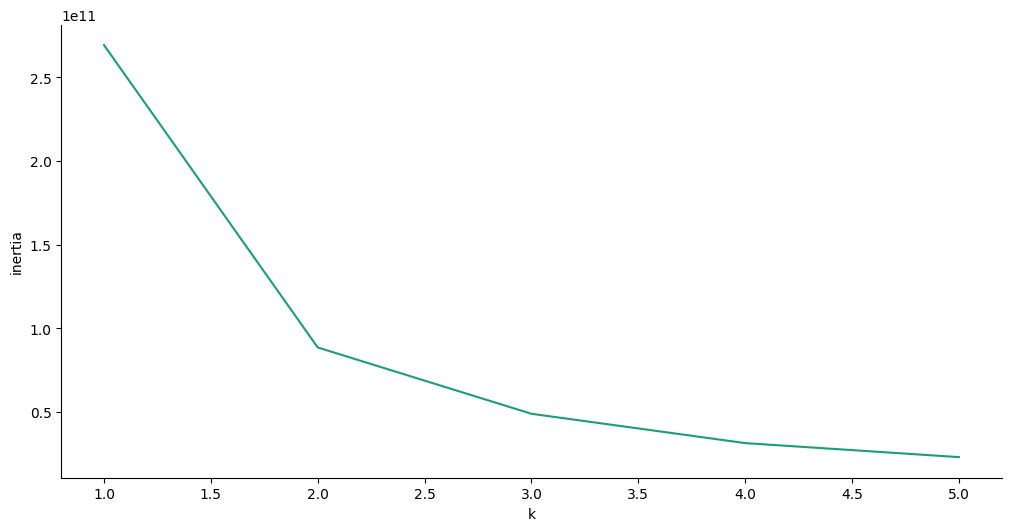

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['k']
  ys = series['inertia']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('k', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('k')
_ = plt.ylabel('inertia')

In [11]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k)


:Curve   [k]   (inertia)

In [15]:
# Define the model with the lower value of k clusters
# Use a random_state of 1 to generate the model
model = KMeans(n_clusters=3, random_state=1)

# Fit the model
model.fit(store_sales_df)

# Make predictions
k_lower = model.predict(store_sales_df)

# Create a copy of the DataFrame
store_sales_cluster_df = store_sales_df.copy()

# Add a class column with the labels to the spread_df_predictions DataFrame
store_sales_cluster_df['cluster_number'] = k_lower

#Print prediction
store_sales_cluster_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,sq_ft,sales_per_sq_ft,cluster_number
0,1,1659,1961,530,66490,14931,4.453151,0
1,2,1461,1752,210,39820,13149,3.028367,2
2,3,1340,1609,720,54010,12060,4.478441,0
3,4,1451,1748,620,53730,13059,4.114404,0
4,5,1770,2111,450,46620,15930,2.926554,2


In [19]:
#Start Spark Session
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
# Create a SparkSession object
spark = SparkSession.builder.getOrCreate()
# Create a DataFrame from the existing store_sales_cluster_df variable
store_sales_cluster_df = spark.createDataFrame(store_sales_cluster_df)
#create temp table to use spark.sql to understand cluster
store_sales_cluster_df.createOrReplaceTempView("cluster")
#group by cluster and look at average sales, sq. ft, and sales per sq. ft
store_sales_cluster_df.groupBy("cluster_number").agg(avg("Store_Sales"), avg("Sq_Ft"), avg("Sales_Per_Sq_Ft")).show()


PySparkTypeError: [SHOULD_NOT_DATAFRAME] Argument `data` should not be a DataFrame.